In [1]:
#00. 패키지 호출
import pandas as pd 
import numpy as np 
import warnings 
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.linear_model import ElasticNet # 엘라스틱넷
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

#00-1. warning message ignore 
warnings.filterwarnings(action='ignore')

#00-2. 난수씨드값 지정하기.
np.random.seed(2021)

#00-3. 시각화 옵션 설정하기. 
%matplotlib inline

In [48]:
# load data
df = pd.read_csv("C:/폐교/y_staff.csv")
df.head()

,silver_hall,welfare_facil_w,jobforpay,stress,melancholy,poor_60,ratio_old,infra,alone_hh_ratio,welfare_staff
0,515,0.004881,15053.85360,26.0,11.5,23155.860,12.6,438,9.262183,0.999506
1,515,0.004881,15100.35336,26.0,11.5,23227.386,12.6,168,9.262183,0.999506
2,515,0.004881,15154.30728,26.0,11.5,23310.378,12.7,132,9.262183,0.999506
3,515,0.004881,15204.71160,26.0,11.5,23387.910,12.7,508,9.262183,0.999506
4,515,0.004881,15256.89072,26.0,11.5,23468.172,12.7,136,9.262183,0.999506


In [50]:
# 칼럼 확인
df.columns

Index(['silver_hall', 'welfare_facil_w', 'jobforpay', 'stress', 'melancholy',
       'poor_60', 'ratio_old', 'infra', 'alone_hh_ratio', 'welfare_staff'],
      dtype='object')

In [51]:
# 원본 보관 
df_raw = df

In [52]:
df=df[df.columns.difference(['alone_hh_ratio'])]

# EDA

In [53]:
corr_matrix = df.corr()

# 타겟값을 기준으로 관계가 높은 다른 특성들을 정렬해서 역순으로 나열해봅시다.

corr_matrix["welfare_staff"].sort_values(ascending=False)

welfare_staff      1.000000
welfare_facil_w    0.743028
ratio_old          0.503363
stress             0.160381
melancholy         0.042295
infra             -0.023720
silver_hall       -0.802157
poor_60           -0.921472
jobforpay         -0.933895
Name: welfare_staff, dtype: float64

복지필요지수와 가장 높은 양의 상관관계를 갖는 특성은 welfare_facil_w(복지시설이 필요한 지역 가중치값)이다. 그 다음으로 alone_hh_ratio(경남 시군별 65세 독거노인인구 비율), ratio_old(고령화인구비율) 등의 특성이 나열되어 있다.

In [54]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib as mpl
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

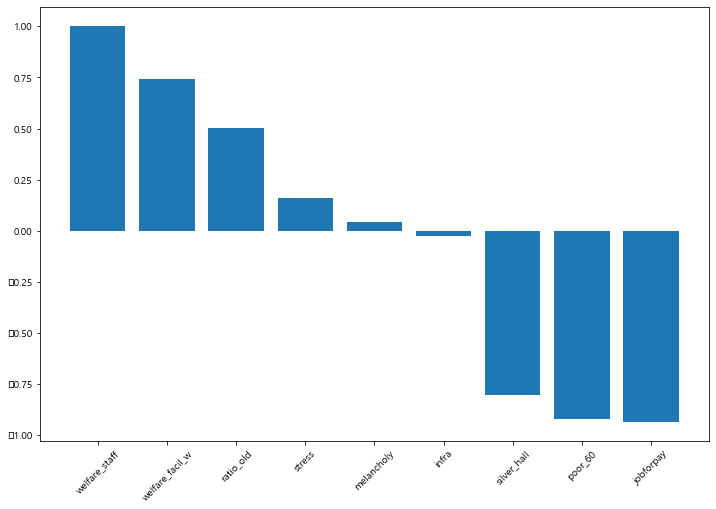

In [55]:
corr_df = pd.DataFrame(corr_matrix["welfare_staff"].sort_values(ascending=False))

plt.figure(figsize=(12,8))
plt.bar(corr_df.index, corr_df["welfare_staff"])
plt.xticks(rotation=45)

array([[<AxesSubplot:xlabel='silver_hall', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='welfare_facil_w', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='jobforpay', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='stress', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='melancholy', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='poor_60', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='ratio_old', ylabel='silver_hall'>,
        <AxesSubplot:xlabel='infra', ylabel='silver_hall'>],
       [<AxesSubplot:xlabel='silver_hall', ylabel='welfare_facil_w'>,
        <AxesSubplot:xlabel='welfare_facil_w', ylabel='welfare_facil_w'>,
        <AxesSubplot:xlabel='jobforpay', ylabel='welfare_facil_w'>,
        <AxesSubplot:xlabel='stress', ylabel='welfare_facil_w'>,
        <AxesSubplot:xlabel='melancholy', ylabel='welfare_facil_w'>,
        <AxesSubplot:xlabel='poor_60', ylabel='welfare_facil_w'>,
        <AxesSubplot:xlabel='ratio_old', ylabel='welfare_facil_w'>,
       

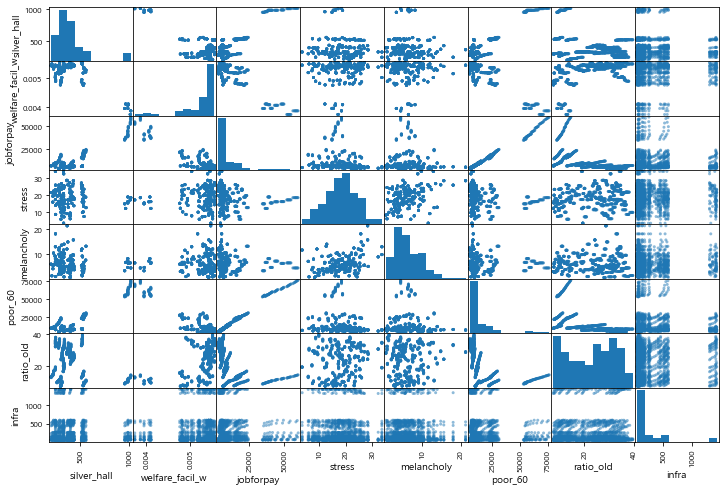

In [56]:
from pandas.plotting import scatter_matrix

attributes = ['silver_hall', 'welfare_facil_w', 'jobforpay', 'stress', 'melancholy','poor_60', 'ratio_old', 'infra']
scatter_matrix(df[attributes], figsize=(12, 8))

# 모델링 데이터 준비

In [12]:
from sklearn.model_selection import train_test_split

x = df[['alone_household','alone_hh_ratio','silver_hall','welfare_facil_w','jobforpay','stress','melancholy','poor_60']]
y = df[['welfare_staff']]

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1209, 8), (519, 8), (1209, 1), (519, 1))

# 엘라스틱넷 모델링

In [13]:
# 모형 생성
model_elastic = ElasticNet()
model_elastic.fit(x_train, y_train)

ElasticNet()

# 모델 테스트

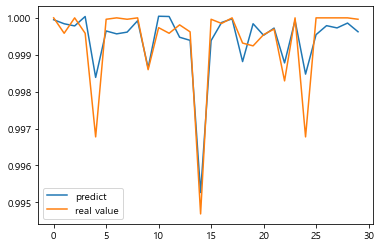

In [14]:
plt.plot(model_elastic.predict(x_test[:30]), label="predict")
plt.plot(y_test[:30].values.reshape(-1, 1), label="real value")
plt.legend()

테스트셋의 x 데이터 30개를 이용해 rent 비용을 예측하고 실제 테스트셋의 y데이터를 확인한 결과 대체적으로 비슷한 결과

전체 test 데이터를 이용해 값을 예측하고 실제 값과 비교하여 산점도를 그려 선형적인 모습인지 확인

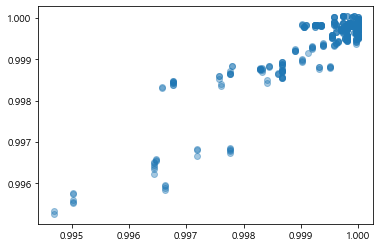

In [15]:
y_predict = model_elastic.predict(x_test)

plt.scatter(y_test, y_predict, alpha = 0.4)
plt.show()

In [16]:
print(model_elastic.score(x_train, y_train))

0.8676120106388763


In [17]:

# 데이터셋 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaling = scaler.fit_transform(df.iloc[:,:-1])
df_scaling = pd.DataFrame(df_scaling, columns=['alone_household','alone_hh_ratio','silver_hall','welfare_facil_w','jobforpay','stress','melancholy','poor_60'])
df_scaling['welfare_staff'] = df.iloc[:,-1].astype('int')
df_scaling

,alone_household,alone_hh_ratio,silver_hall,welfare_facil_w,jobforpay,stress,melancholy,poor_60,welfare_staff
0,0.329826,0.211273,0.381188,0.629284,0.208380,0.745033,0.526829,0.257652,0
1,0.329826,0.211273,0.381188,0.629284,0.209202,0.745033,0.526829,0.258656,0
2,0.329826,0.211273,0.381188,0.629284,0.210157,0.745033,0.526829,0.259821,0
3,0.329826,0.211273,0.381188,0.629284,0.211048,0.745033,0.526829,0.260909,0
4,0.329826,0.211273,0.381188,0.629284,0.211971,0.745033,0.526829,0.262035,0
...,...,...,...,...,...,...,...,...,...
1723,0.075003,0.712684,0.393564,0.976162,0.063868,0.208609,0.039024,0.055565,0
1724,0.075003,0.712684,0.393564,0.976162,0.064022,0.208609,0.039024,0.055721,0
1725,0.075003,0.712684,0.393564,0.976162,0.064162,0.208609,0.039024,0.055862,0
1726,0.075003,0.712684,0.393564,0.976162,0.064281,0.208609,0.039024,0.055983,0


In [18]:
# 결측값 확인
df_scaling.isna().sum()

alone_household    0
alone_hh_ratio     0
silver_hall        0
welfare_facil_w    0
jobforpay          0
stress             0
melancholy         0
poor_60            0
welfare_staff      0
dtype: int64

In [19]:
# 데이터셋 탐색
df_scaling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   alone_household  1728 non-null   float64
 1   alone_hh_ratio   1728 non-null   float64
 2   silver_hall      1728 non-null   float64
 3   welfare_facil_w  1728 non-null   float64
 4   jobforpay        1728 non-null   float64
 5   stress           1728 non-null   float64
 6   melancholy       1728 non-null   float64
 7   poor_60          1728 non-null   float64
 8   welfare_staff    1728 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 114.9 KB


In [20]:
df_scaling.describe()

,alone_household,alone_hh_ratio,silver_hall,welfare_facil_w,jobforpay,stress,melancholy,poor_60,welfare_staff
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.154752,0.451629,0.245514,0.830484,0.119766,0.492228,0.274932,0.128481,0.340278
std,0.196989,0.285760,0.206611,0.203527,0.170771,0.195562,0.172600,0.184507,0.473940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.055191,0.190599,0.125619,0.806268,0.033638,0.367550,0.151220,0.036786,0.000000
50%,0.081690,0.485112,0.182550,0.904647,0.055452,0.496689,0.243902,0.055050,0.000000
75%,0.163166,0.666889,0.281869,0.951567,0.114147,0.628311,0.365854,0.118005,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# 파라미터 확인
model_elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [22]:
# GridSearch를 위한 하이퍼파라미터 값 지정하기
params = {
    'alpha' : [0.0001,0.01,1,2,3,4],
    'l1_ratio' : [0.5, 0.7]
}

# GridsearchCV() 메서드를 이용해 훈련 모델 할당하기. 
gscv_model_elastic = GridSearchCV(model_elastic, param_grid=params, cv=10)

# 모형 학습하기. 
gscv_model_elastic.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.01, 1, 2, 3, 4],
                         'l1_ratio': [0.5, 0.7]})

In [23]:
# 최적 하이퍼 파라미터 확인하기. 
gscv_model_elastic.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.7}

In [24]:
gscv_model_elastic.best_score_

0.8857311739525537

In [25]:
# test 데이터셋으로 모형 예측 및 평가하기. 
#① R-squared
gscv_model_elastic_fit = gscv_model_elastic.best_estimator_
gscv_model_elastic_pred = gscv_model_elastic_fit.predict(x_test)
r2_score(y_test,gscv_model_elastic_pred)

0.8583932095660094

In [27]:
#② RMSE 
mse = mean_squared_error(y_test,gscv_model_elastic_pred)
rmse = np.sqrt(mse)
rmse

0.0003721979795536801